# TopSBM: Topic Modeling with Stochastic Block Models

A basic tutorial.


In [13]:
%load_ext autoreload
%autoreload 2

import os
import pylab as plt
%matplotlib inline  

from sbmtm import sbmtm
import graph_tool.all as gt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Setup: Load a corpus

1) We have a list of documents, each document contains a list of words.

2) We have a list of document titles (optional) 

The example corpus consists of 63 articles from Wikipedia taken from 3 different categories (Experimental Physics, Chemical Physics, and Computational Biology).



In [14]:
path_data = ''

## texts
fname_data = 'corpus.txt'
filename = os.path.join(path_data,fname_data)

with open(filename,'r') as f:
    x = f.readlines()
texts = [h.split() for h in x]

## titles
fname_data = 'titles.txt'
filename = os.path.join(path_data,fname_data)

with open(filename,'r') as f:
    x = f.readlines()
titles = [h.split()[0] for h in x]

In [15]:
i_doc = 0
print(titles[0])
print(texts[i_doc][:10])


Nuclear_Overhauser_effect
['the', 'nuclear', 'overhauser', 'effect', 'noe', 'is', 'the', 'transfer', 'of', 'nuclear']


# Fitting the model

In [16]:
## we create an instance of the sbmtm-class
model = sbmtm()

## we have to create the word-document network from the corpus
model.make_graph(texts,documents=titles)

## we can also skip the previous step by saving/loading a graph
# model.save_graph(filename = 'graph.xml.gz')
# model.load_graph(filename = 'graph.xml.gz')

## fit the model
gt.seed_rng(32) ## seed for graph-tool's random number generator --> same results
model.fit()

# Plotting the result

The output shows the (hierarchical) community structure in the word-document network as inferred by the stochastic block model:

- document-nodes are on the left
- word-nodes are on the right
- different colors correspond to the different groups

The result is a grouping of nodes into groups on multiple levels in the hierarchy:

- on the uppermost level, each node belongs to the same group (square in the middle)
- on the next-lower level, we split the network into two groups: the word-nodes and the document-nodes (blue sqaures to the left and right, respectively). This is a trivial structure due to the bipartite character of the network.
- only next lower levels constitute a non-trivial structure: We now further divide nodes into smaller groups (document-nodes into document-groups on the left and word-nodes into word-groups on the right)

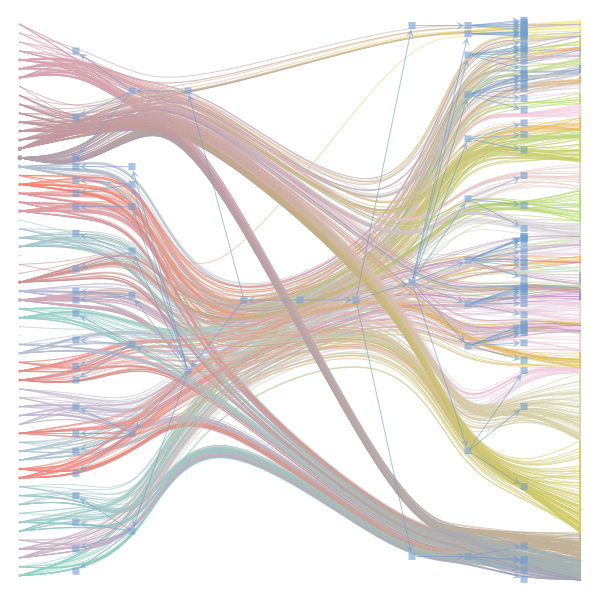

In [20]:
model.plot(nedges=1000)

# The basics

## Topics
For each word-group on a given level in the hierarchy, we retrieve the $n$ most common words in each group -- these are the topics!


In [21]:
model.topics(l=1,n=20)

{0: [('the', 0.015563241106719368),
  ('of', 0.015316205533596838),
  ('a', 0.015069169960474308),
  ('is', 0.014822134387351778),
  ('in', 0.014822134387351778),
  ('to', 0.01457509881422925),
  ('and', 0.01408102766798419),
  ('for', 0.012351778656126482),
  ('as', 0.012104743083003952),
  ('an', 0.012104743083003952),
  ('with', 0.011857707509881422),
  ('be', 0.011363636363636364),
  ('which', 0.011363636363636364),
  ('that', 0.011116600790513834),
  ('on', 0.011116600790513834),
  ('by', 0.011116600790513834),
  ('can', 0.010869565217391304),
  ('are', 0.010869565217391304),
  ('or', 0.010375494071146246),
  ('from', 0.010128458498023716)],
 1: [('theory', 0.02252252252252252),
  ('quantum', 0.021021021021021023),
  ('electrons', 0.018018018018018018),
  ('observed', 0.018018018018018018),
  ('electron', 0.016516516516516516),
  ('magnetic', 0.016516516516516516),
  ('principle', 0.016516516516516516),
  ('early', 0.016516516516516516),
  ('spectroscopy', 0.013513513513513514),
 

## Topic-distribution in each document
Which topics contribute to each document?

In [22]:
## select a document (by its index)
i_doc = 0
print(model.documents[i_doc])
## get a list of tuples (topic-index, probability)
model.topicdist(i_doc,l=1)

Nuclear_Overhauser_effect


[(0, 0.3706293706293706),
 (1, 0.2097902097902098),
 (2, 0.055944055944055944),
 (3, 0.04195804195804196),
 (4, 0.03496503496503497),
 (5, 0.0979020979020979),
 (6, 0.055944055944055944),
 (7, 0.0979020979020979),
 (8, 0.03496503496503497),
 (9, 0.0),
 (10, 0.0)]

# Extra: Clustering of documents - for free.
The stochastic block models clusters the documents into groups.
We do not need to run an additional clustering to obtain this grouping.


In [23]:
model.clusters(l=1,n=5)

{0: [('Nuclear_Overhauser_effect', 1.0),
  ('Einstein–de_Haas_effect', 1.0),
  ('Quantum_oscillations_(experimental_technique)', 1.0),
  ('Rovibrational_coupling', 1.0),
  ('Effective_field_theory', 1.0)],
 1: [('Wave_tank', 1.0),
  ('Anisotropic_liquid', 1.0),
  ('Ripple_tank', 1.0),
  ('Line_source', 1.0),
  ('Point_source', 1.0)],
 2: [('International_Society_for_Computational_Biology', 1.0),
  ('IEEE/ACM_Transactions_on_Computational_Biology_and_Bioinformatics', 1.0),
  ('Experimental_physics', 1.0),
  ('List_of_Directors_General_of_CERN', 1.0),
  ('Chemical_physics', 1.0)],
 3: [('Polarizability', 1.0)],
 4: [('Molecular_vibration', 1.0), ('Photofragment-ion_imaging', 1.0)],
 5: [('De_novo_transcriptome_assembly', 1.0),
  ('SLAC_National_Accelerator_Laboratory', 1.0),
  ('Bioinformatics', 1.0),
  ('Computational_biology', 1.0),
  ('Folding@home', 1.0)],
 6: [("Newton's_laws_of_motion", 1.0), ("Euler's_laws_of_motion", 1.0)],
 7: [('Philosophical_interpretation_of_classical_physics

Application -- Finding similar articles:

For a query-article, we return all articles from the same group

In [24]:
## select a document (index)
i_doc = 2
print(i_doc,model.documents[i_doc])
## find all articles from the same group
## print: (doc-index, doc-title)
model.clusters_query(i_doc,l=1,)

2 Rovibrational_coupling


[(0, 'Nuclear_Overhauser_effect'),
 (3, 'Effective_field_theory'),
 (5, 'Rotational_transition'),
 (6, 'Dynamic_nuclear_polarisation'),
 (11, 'RRKM_theory'),
 (16, 'Reactive_empirical_bond_order'),
 (18, 'Molecular_beam'),
 (29, 'Complementary_experiments'),
 (38, 'Einstein–de_Haas_effect'),
 (44, 'Quantum_oscillations_(experimental_technique)')]

# More technical: Group membership
In the stochastic block model, word (-nodes) and document (-nodes) are clustered into different groups.

The group membership can be represented by the conditional probability $P(\text{group}\, |\, \text{node})$. Since words and documents belong to different groups (the word-document network is bipartite) we can show separately:

- P(bd | d), the probability of document $d$ to belong to document group $bd$
- P(bw | w), the probability of word $w$ to belong to word group $bw$.

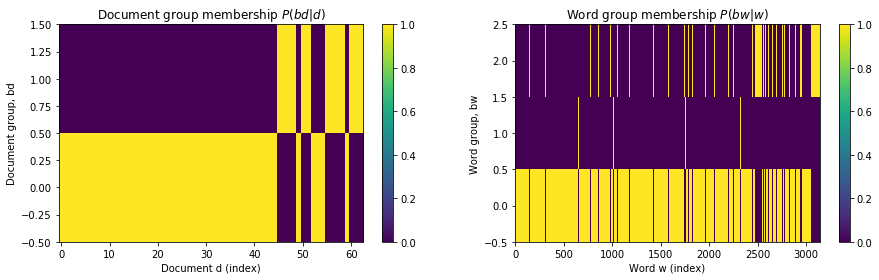

In [10]:
p_td_d,p_tw_w = model.group_membership(l=1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.imshow(p_td_d,origin='lower',aspect='auto',interpolation='none')
plt.title(r'Document group membership $P(bd | d)$')
plt.xlabel('Document d (index)')
plt.ylabel('Document group, bd')
plt.colorbar()

plt.subplot(122)
plt.imshow(p_tw_w,origin='lower',aspect='auto',interpolation='none')
plt.title(r'Word group membership $P(bw | w)$')
plt.xlabel('Word w (index)')
plt.ylabel('Word group, bw')
plt.colorbar()